In [1]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
from librosa.display import specshow
from IPython.display import display, Audio

from res.plot import set_default

In [2]:
x, sampling_rate = librosa.load('./dataset/SaReGa.wav')

In [3]:
T  = x.size/sampling_rate
dt = 1/sampling_rate
t  = np.r_[0:T:dt]

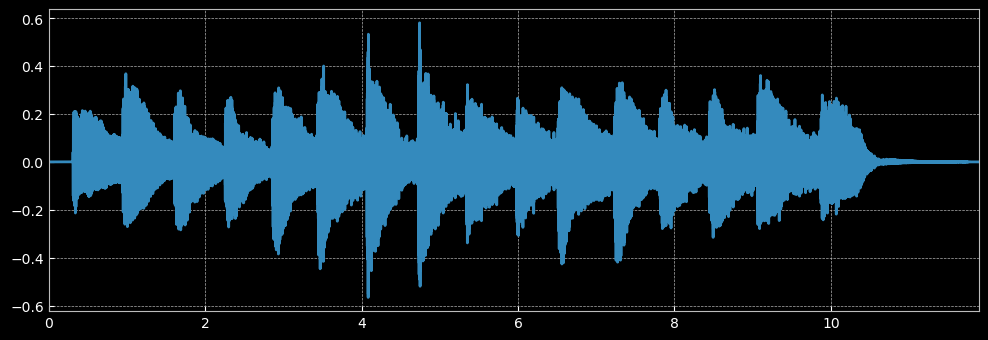

In [4]:
set_default(figsize=(12,4))

plt.plot(t, x)
plt.xlim([0, T])
plt.show()

In [ ]:
Audio(x, rate=sampling_rate)

In [5]:
X    = librosa.stft(x)
X_dB = librosa.amplitude_to_db(np.abs(X))

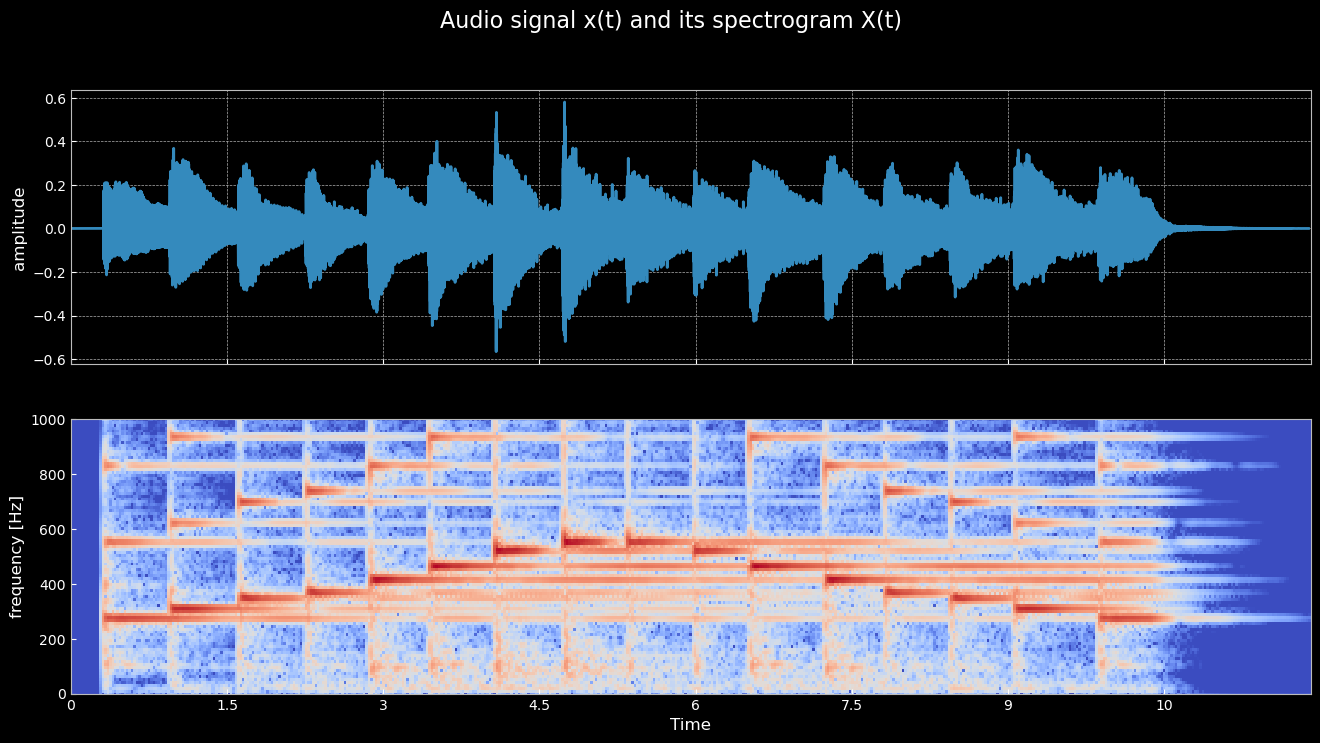

In [6]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(16,8))
plt.xlim([0, T])

ax[0].plot(t, x)
ax[0].set_ylabel('amplitude')

specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz', ax=ax[1])
ax[1].set_ylim(top=1000)
ax[1].set_ylabel('frequency [Hz]')

plt.suptitle('Audio signal x(t) and its spectrogram X(t)', size=16)
plt.show()

In [7]:
# # generate tones (G#3 Scale - Common Female Scale)
# Sa = 207.65
# Re = 233.08
# Ga = 261.63
# Ma = 277.18
# Pa = 311.13
# Dh = 349.23
# Ni = 392.00
# SA = 415.30

# # generate tones (C#3 Scale - Common Male Scale)
# Sa = 138.59
# Re = 155.56
# Ga = 174.61
# Ma = 185.00
# Pa = 207.65
# Dh = 233.08
# Ni = 261.63
# SA = 277.18

# generate tones (C#4 - Scale Piano C#3)
Sa = 277.18
Re = 311.13
Ga = 349.23
Ma = 369.99
Pa = 415.30
Dh = 466.16
Ni = 523.25
SA = 554.37



TT = 0.1  #s filter length
tt = np.r_[0:TT:dt]

a = 0.1
A = {
    'Sa': a*np.sin(2 * np.pi * Sa * tt),
    'Re': a*np.sin(2 * np.pi * Re * tt),
    'Ga': a*np.sin(2 * np.pi * Ga * tt),
    'Ma': a*np.sin(2 * np.pi * Ma * tt),
    'Pa': a*np.sin(2 * np.pi * Pa * tt),
    'Dh': a*np.sin(2 * np.pi * Dh * tt),
    'Ni': a*np.sin(2 * np.pi * Ni * tt),
    'SA': a*np.sin(2 * np.pi * SA * tt),
}

In [8]:
xx = np.concatenate([a[1] for a in A.items()])

In [9]:
XX    = librosa.stft(xx)
XX_dB = librosa.amplitude_to_db(np.abs(XX))

[]

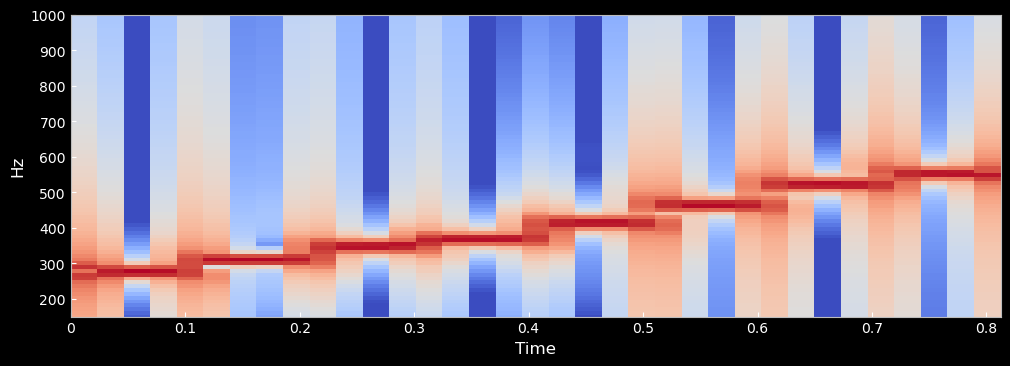

In [10]:
specshow(XX_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.ylim(bottom=150, top=1000)
plt.plot()

In [ ]:
display(Audio(xx, rate=sampling_rate))
display(Audio(x, rate=sampling_rate))

# Convolutions

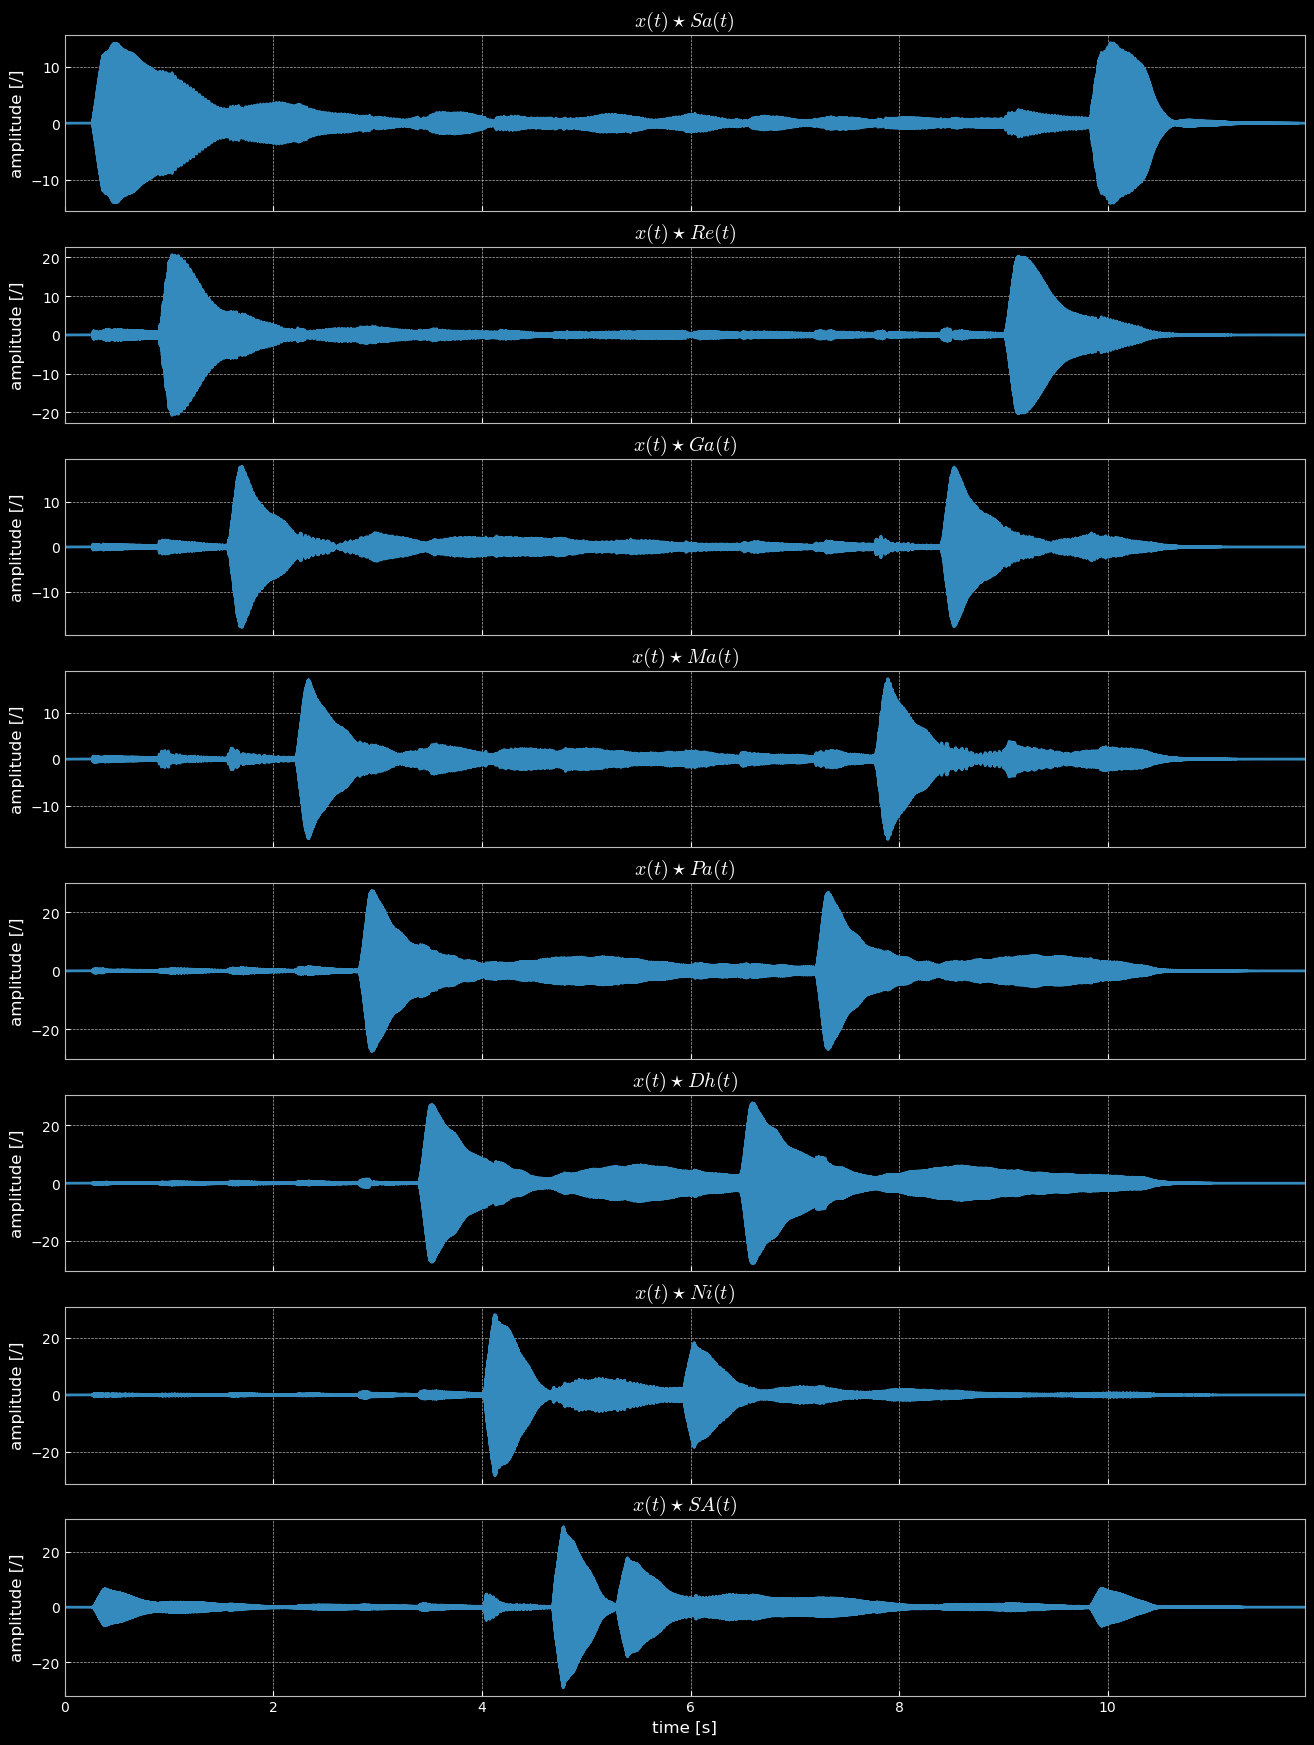

In [11]:
fig, axs = plt.subplots(8, 1, sharex=True, figsize=(16,22))
plt.xlim([0, T])
convs = []

for i, a in enumerate(A.items()):
    convs.append(np.convolve(x, a[1], mode='same'))
    axs[i].set_title(rf'$x(t) \star {a[0]}(t)$')
    axs[i].plot(t, convs[-1])
    axs[i].set_ylabel('amplitude [/]')

plt.xlabel('time [s]')
plt.show()

In [ ]:
# let's listen to these convolutions!
for c in convs:
    display(Audio(c, rate=sampling_rate))